In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
folder = '../../../measurements/D1002969_transimpedence/'

In [8]:
PD_label_1 = '256'
PD_label_2 = '259'
PD_label_3 = '255'

In [9]:
PD_labels = [PD_label_1, PD_label_2, PD_label_3]

In [10]:
amp = np.array([np.loadtxt(folder + i + '/' + i + '_DC_amplitude.TXT') for i in PD_labels])
phase = np.array([np.loadtxt(folder + i + '/' + i + '_DC_phase.TXT') for i in PD_labels])

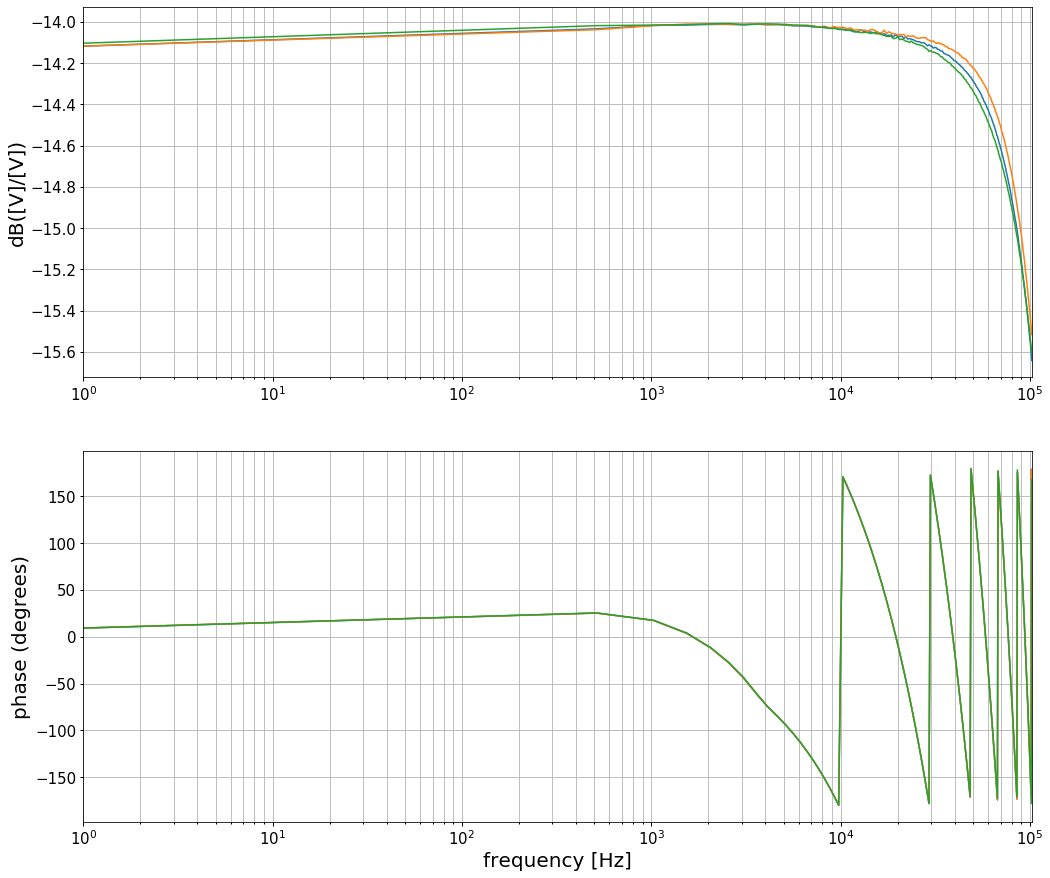

In [13]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
for i in range(len(PD_labels)):
    plt.plot(amp[i,:,0],amp[i,:,1],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('dB([V]/[V])',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([amp[0][:,0][0],amp[0][:,0][-1]])
ax.set_xscale('log')
plt.subplot(212)
for i in range(len(PD_labels)):
    plt.plot(phase[i][:,0],phase[i][:,1],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('phase (degrees)',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlabel('frequency [Hz]',fontsize=20)
plt.xlim([phase[0][:,0][0],phase[0][:,0][-1]])
ax.set_xscale('log')

In [17]:
#Converting from dB to transimpedence
inj_resistor = 10e3
transimp = np.array([inj_resistor*10**(i/20) for i in amp[:,:,1]])

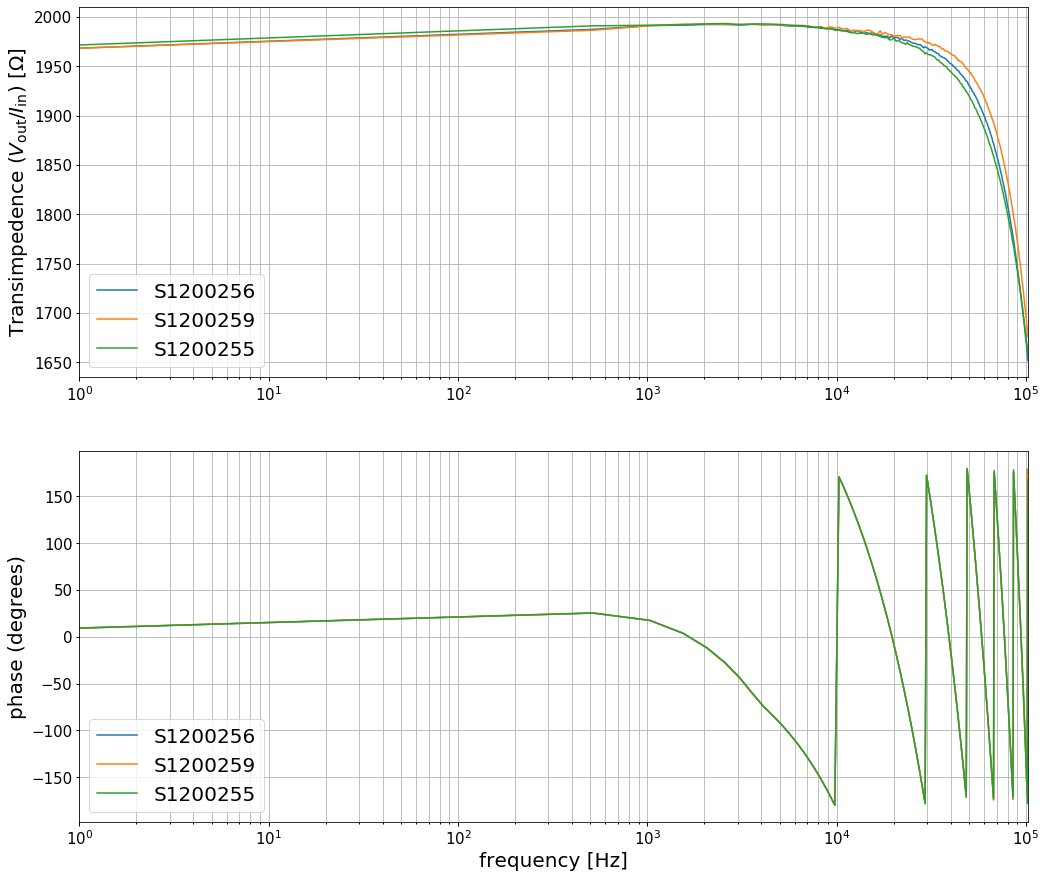

In [18]:
fig = plt.figure(figsize=(17,15))
plt.subplot(211)
for i in range(len(PD_labels)):
    plt.plot(amp[i,:,0],transimp[i],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('Transimpedence ($V_\mathrm{out}$/$I_\mathrm{in}$) [$\Omega$]',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlim([amp[0][:,0][0],amp[0][:,0][-1]])
ax.set_xscale('log')
plt.legend(prop={'size':20})
plt.subplot(212)
for i in range(len(PD_labels)):
    plt.plot(phase[i,:,0],phase[i,:,1],label='S1200'+PD_labels[i])
ax = plt.gca()
plt.ylabel('phase (degrees)',fontsize=20)
plt.grid('True', which='both')
plt.grid('True')
ax.tick_params(which='both', width=1)
ax.tick_params(which='minor', length=2)
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
plt.xlabel('frequency [Hz]',fontsize=20)
plt.xlim([phase[0][:,0][0],phase[0][:,0][-1]])
ax.set_xscale('log')
plt.legend(loc=3,prop={'size':20})
plt.savefig(folder+'DC_transimpedence.png',dpi=300,bbox_inches='tight')
